In [2]:
# Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mp_statcast.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 0으로 대체)
data = data.fillna(0)

# 'pitch_hand' 컬럼이 있는 경우 원-핫 인코딩
if 'pitch_hand' in data.columns:
    data = pd.get_dummies(data, columns=['pitch_hand'], drop_first=True)

# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 모델 정의
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)


RMSE: 0.6019077532652616
MAE: 0.4597899204458065
MAPE: 0.12042263858290739
R2: 0.7840217219181358
      Actual  Predicted
3151    7.40   7.021290
3152    5.06   4.985245
3153    3.22   3.212140
3154    3.63   4.114928
3155    7.04   6.927942
...      ...        ...
3589    3.81   3.483151
3590    5.72   5.872849
3591    5.81   5.020964
3592    9.00   6.988575
3593    4.84   4.378300

[443 rows x 2 columns]


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Ridge Regression - RMSE: 0.6228414379373354, MAE: 0.467929557309243, MAPE: 0.1232934424642816, R2: 0.7846064167758358
Lasso Regression - RMSE: 0.654076920422512, MAE: 0.4855378155794368, MAPE: 0.12763384669634237, R2: 0.7624607320209914


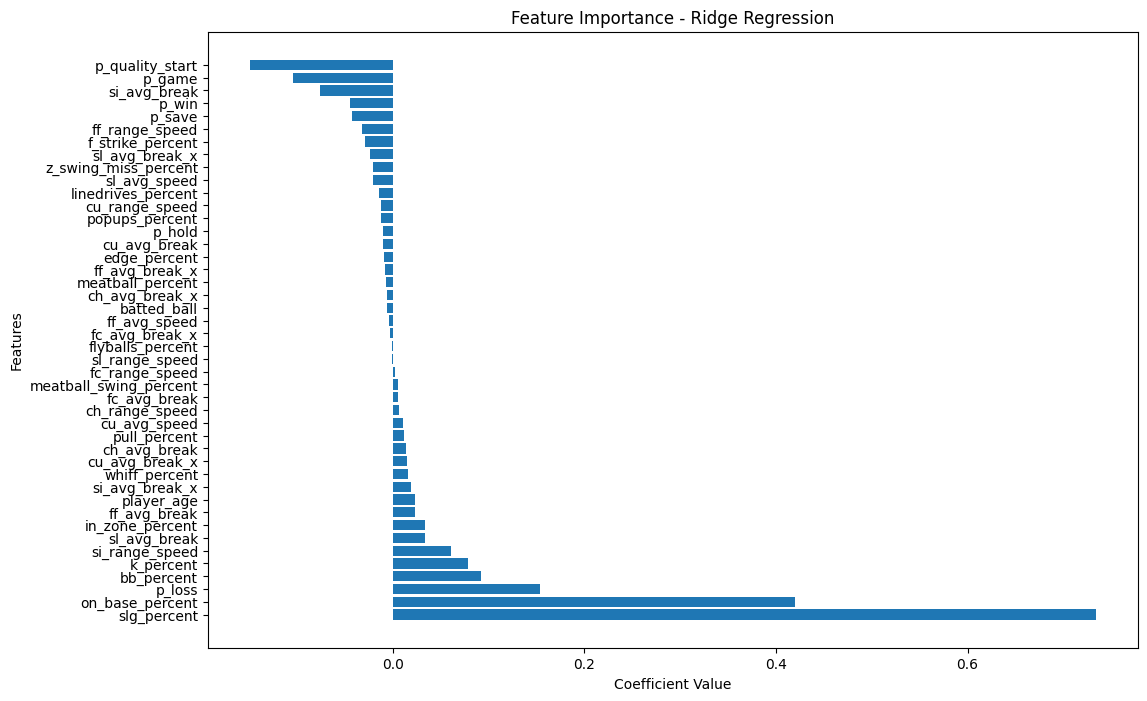

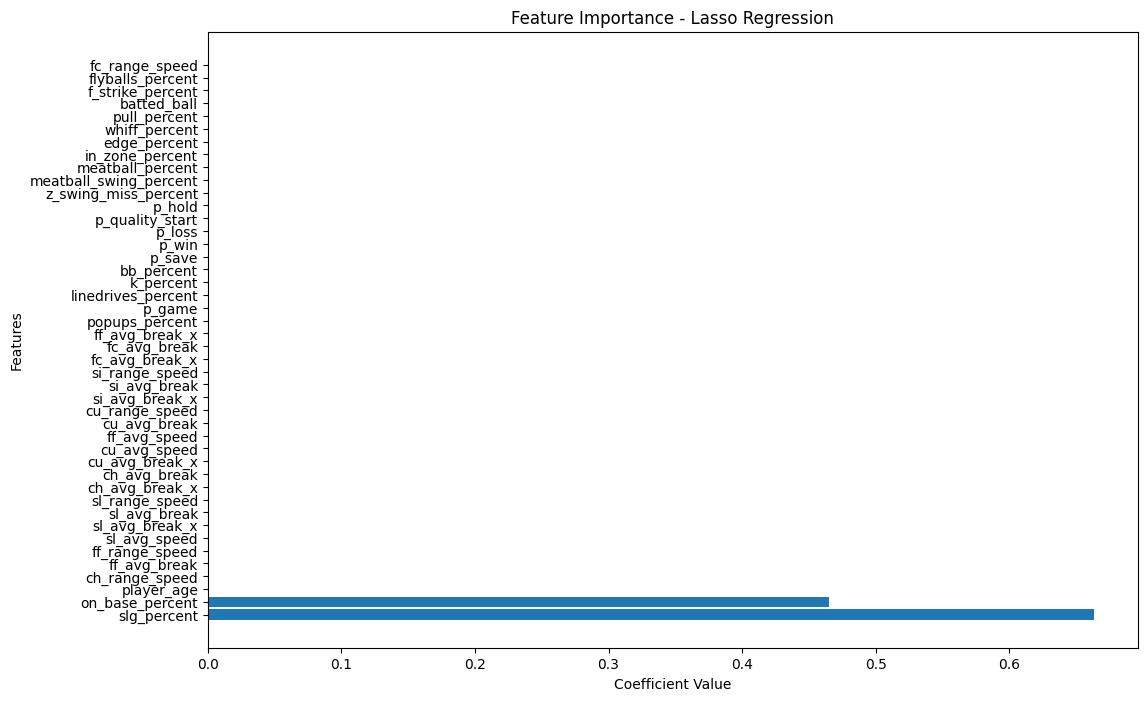

In [1]:
# Ridge, Lasso

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Load dataset
file_path = 'C:\\Users\\co279\\mp_statcast.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['last_name, first_name', 'player_id'])

# Fill missing values
data = data.fillna(0)

# Define target and features
target = 'p_era'
features = data.columns.drop([target, 'year'])

# Convert 'pitch_hand' column to dummy variables if it exists
if 'pitch_hand' in features:
    data = pd.get_dummies(data, columns=['pitch_hand'], drop_first=True)

# Update the features list after get_dummies
features = data.columns.drop([target, 'year'])

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# VIF 계산 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# VIF 계산
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
vif_data = calculate_vif(X_train_df)

# VIF가 10을 넘는 변수 제거
vif_data_filtered = vif_data[vif_data["VIF"] <= 10]
filtered_features = vif_data_filtered["feature"].tolist()

X_train_filtered = X_train_df[filtered_features]
X_test_filtered = pd.DataFrame(X_test_scaled, columns=X_train.columns)[filtered_features]

# Define and fit Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_filtered, y_train)

# Define and fit Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_filtered, y_train)

# Make predictions
ridge_pred = ridge_model.predict(X_test_filtered)
lasso_pred = lasso_model.predict(X_test_filtered)

# Evaluate the Ridge model
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Ridge Regression - RMSE: {ridge_rmse}, MAE: {ridge_mae}, MAPE: {ridge_mape}, R2: {ridge_r2}')

# Evaluate the Lasso model
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mape = mean_absolute_percentage_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Lasso Regression - RMSE: {lasso_rmse}, MAE: {lasso_mae}, MAPE: {lasso_mape}, R2: {lasso_r2}')

# Feature importance for Ridge
ridge_coefficients = pd.DataFrame({'Feature': filtered_features, 'Coefficient': ridge_model.coef_})
ridge_coefficients = ridge_coefficients.sort_values(by='Coefficient', ascending=False)

# Feature importance for Lasso
lasso_coefficients = pd.DataFrame({'Feature': filtered_features, 'Coefficient': lasso_model.coef_})
lasso_coefficients = lasso_coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting Ridge feature importance
plt.figure(figsize=(12, 8))
plt.barh(ridge_coefficients['Feature'], ridge_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance - Ridge Regression')
plt.show()

# Plotting Lasso feature importance
plt.figure(figsize=(12, 8))
plt.barh(lasso_coefficients['Feature'], lasso_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance - Lasso Regression')
plt.show()

In [6]:
# Elastic Net

import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = 'C:\\Users\\co279\\mp_statcast.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['last_name, first_name', 'player_id'])

# Fill missing values
data = data.fillna(0)

# Define target and features
target = 'p_era'
features = data.columns.drop([target, 'year'])

# Convert 'pitch_hand' column to dummy variables if it exists
if 'pitch_hand' in features:
    data = pd.get_dummies(data, columns=['pitch_hand'], drop_first=True)

# Update the features list after get_dummies
features = data.columns.drop([target, 'year'])

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # alpha is the overall strength, l1_ratio is the mixing parameter
elastic_net.fit(X_train_scaled, y_train)

# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R2: {r2}')

RMSE: 0.9440499180228475
MAE: 0.7262652244012309
MAPE: 0.20118264442719574
R2: 0.5051567147671424


c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 재계산
X_train_df = pd.DataFrame(X_train_scaled, columns=features)

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

# VIF가 10 미만인 변수들만 선택
selected_features = vif_data[vif_data["VIF"] < 10]["feature"].tolist()

# 출력 옵션 설정
pd.set_option('display.max_rows', None)

print("VIF가 10 미만인 변수들:")
print(vif_data)

VIF가 10 미만인 변수들:
                   feature        VIF
0               player_age   1.116640
1                   p_game   3.952169
2                k_percent   1.995856
3               bb_percent   2.491844
4              slg_percent   3.365846
5          on_base_percent   4.872536
6                   p_save   1.921952
7                    p_win   3.749444
8                   p_loss   2.043453
9          p_quality_start   5.870550
10                  p_hold   3.691874
11    z_swing_miss_percent   5.517525
12  meatball_swing_percent   1.224005
13        meatball_percent   2.447001
14         in_zone_percent   2.976756
15            edge_percent   1.477264
16           whiff_percent   5.558301
17            pull_percent   1.090690
18             batted_ball   1.356510
19        f_strike_percent   1.321198
20        flyballs_percent   1.615099
21      linedrives_percent   1.139515
22          popups_percent   1.529166
23            ff_avg_speed   6.036051
24          ff_avg_break_x   5.00